In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/09_Sep.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,26.000000,84.000000,1,6,1,2611.0,2627.0,2573.0,3066.0,3156.0,3562.0,2628.416667,2696.0
1,26.000000,84.666667,1,6,1,2634.0,2624.0,2597.0,3057.0,3098.0,3513.0,2635.750000,2685.0
2,26.000000,85.333333,1,6,1,2652.0,2598.0,2627.0,3028.0,3090.0,3487.0,2639.166667,2668.0
3,26.000000,86.000000,1,6,1,2662.0,2608.0,2605.0,2988.0,3052.0,3468.0,2641.666667,2635.0
4,26.000000,86.666667,2,6,1,2696.0,2611.0,2627.0,2968.0,3055.0,3477.0,2641.000000,2619.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,25.212452,87.862340,23,2,1,2694.0,2709.0,2765.0,2363.0,2560.0,3293.0,2691.250000,2656.0
8636,25.212452,87.862340,24,2,1,2681.0,2691.0,2748.0,2344.0,2545.0,3289.0,2683.000000,2649.0
8637,25.212452,87.862340,24,2,1,2663.0,2675.0,2708.0,2331.0,2534.0,3275.0,2673.583333,2595.0
8638,25.000000,87.862340,24,2,1,2682.0,2701.0,2687.0,2316.0,2542.0,3251.0,2664.750000,2581.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8640 non-null   float64
 1   Hum     8640 non-null   float64
 2   A       8640 non-null   int64  
 3   B       8640 non-null   int64  
 4   C       8640 non-null   int64  
 5   D       8640 non-null   float64
 6   E       8640 non-null   float64
 7   F       8640 non-null   float64
 8   G       8640 non-null   float64
 9   H       8640 non-null   float64
 10  I       8640 non-null   float64
 11  J       8640 non-null   float64
 12  Cons    8640 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 877.6 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8640 non-null   float64
 1   Hum     8640 non-null   float64
 2   A       8640 non-null   float64
 3   B       8640 non-null   float64
 4   C       8640 non-null   float64
 5   D       8640 non-null   float64
 6   E       8640 non-null   float64
 7   F       8640 non-null   float64
 8   G       8640 non-null   float64
 9   H       8640 non-null   float64
 10  I       8640 non-null   float64
 11  J       8640 non-null   float64
 12  Cons    8640 non-null   float64
dtypes: float64(13)
memory usage: 877.6 KB


In [6]:
T = 11
HORIZON = 1


In [7]:
train = stlf_data.copy()[stlf_data.index <= 4800][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-1.076249,-1.17948,1.420610,-1.660674,0.958327,0.717627,-1.306794,-1.262406,-1.408026,-0.101867,0.128640,1.157836,-1.284194
1,-1.106195,-1.17948,1.470215,-1.660674,0.958327,0.717627,-1.244262,-1.270552,-1.342962,-0.125973,-0.024606,1.030692,-1.263870
2,-1.152475,-1.17948,1.519820,-1.660674,0.958327,0.717627,-1.195324,-1.341145,-1.261632,-0.203646,-0.045744,0.963228,-1.254401
3,-1.242313,-1.17948,1.569426,-1.660674,0.958327,0.717627,-1.168137,-1.313994,-1.321274,-0.310781,-0.146147,0.913927,-1.247473
4,-1.285871,-1.17948,1.619031,-1.516238,0.958327,0.717627,-1.075699,-1.305848,-1.261632,-0.364349,-0.138220,0.937280,-1.249320


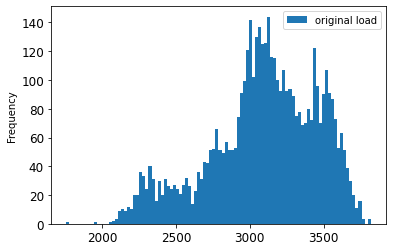

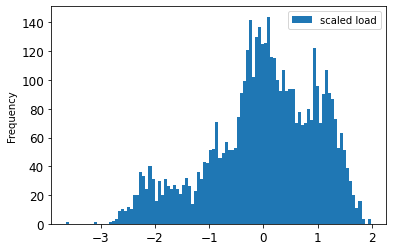

In [9]:
stlf_data[stlf_data.index <= 4800][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 4800][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

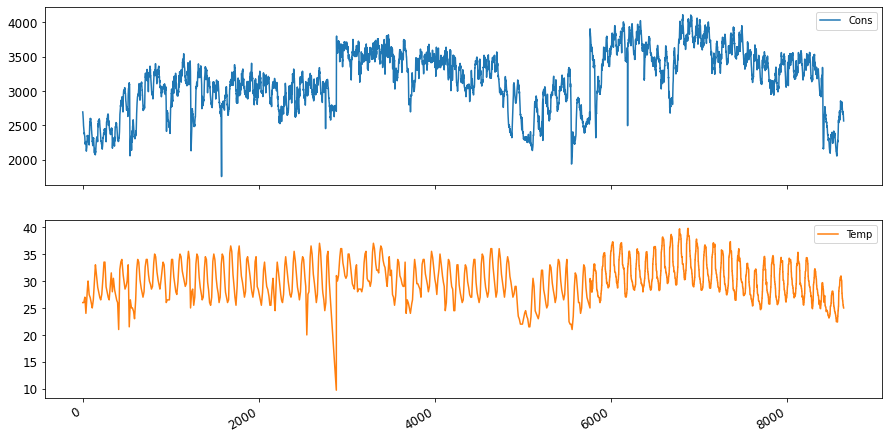

In [10]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [11]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+1'] = train_shifted['Cons'].shift(-1)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
0,-1.076249,-1.17948,1.420610,-1.660674,0.958327,0.717627,-1.306794,-1.262406,-1.408026,-0.101867,0.128640,1.157836,-1.284194,-1.106195
1,-1.106195,-1.17948,1.470215,-1.660674,0.958327,0.717627,-1.244262,-1.270552,-1.342962,-0.125973,-0.024606,1.030692,-1.263870,-1.152475
2,-1.152475,-1.17948,1.519820,-1.660674,0.958327,0.717627,-1.195324,-1.341145,-1.261632,-0.203646,-0.045744,0.963228,-1.254401,-1.242313
3,-1.242313,-1.17948,1.569426,-1.660674,0.958327,0.717627,-1.168137,-1.313994,-1.321274,-0.310781,-0.146147,0.913927,-1.247473,-1.285871
4,-1.285871,-1.17948,1.619031,-1.516238,0.958327,0.717627,-1.075699,-1.305848,-1.261632,-0.364349,-0.138220,0.937280,-1.249320,-1.329428
5,-1.329428,-1.17948,1.668636,-1.516238,0.958327,0.717627,-1.105605,-1.243400,-1.269765,-0.468806,-0.212201,0.854247,-1.254170,-1.372986
6,-1.372986,-1.17948,1.718242,-1.516238,0.958327,0.717627,-1.151824,-1.194528,-1.340251,-0.557192,-0.254476,0.786783,-1.256711,-1.479158
7,-1.479158,-1.17948,1.767847,-1.516238,0.958327,0.717627,-1.241544,-1.167377,-1.313141,-0.610760,-0.333741,0.766025,-1.270568,-1.571718
8,-1.571718,-1.17948,1.817452,-1.371801,0.958327,0.717627,-1.285044,-1.075062,-1.305008,-0.621474,-0.346952,0.698561,-1.292970,-1.615275
9,-1.615275,-1.17948,1.867058,-1.371801,0.958327,0.717627,-1.328544,-1.104929,-1.242655,-0.755393,-0.383943,0.636286,-1.324380,-1.661555


In [12]:
for t in range(1, T+1):
    train_shifted['Cons_t-'+str(T-t)] = train_shifted['Cons'].shift(T-t)
train_shifted = train_shifted.rename(columns={'Cons':'Cons_original'})
train_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
0,-1.076249,-1.17948,1.420610,-1.660674,0.958327,0.717627,-1.306794,-1.262406,-1.408026,-0.101867,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.076249
1,-1.106195,-1.17948,1.470215,-1.660674,0.958327,0.717627,-1.244262,-1.270552,-1.342962,-0.125973,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.076249,-1.106195
2,-1.152475,-1.17948,1.519820,-1.660674,0.958327,0.717627,-1.195324,-1.341145,-1.261632,-0.203646,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.076249,-1.106195,-1.152475
3,-1.242313,-1.17948,1.569426,-1.660674,0.958327,0.717627,-1.168137,-1.313994,-1.321274,-0.310781,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.076249,-1.106195,-1.152475,-1.242313
4,-1.285871,-1.17948,1.619031,-1.516238,0.958327,0.717627,-1.075699,-1.305848,-1.261632,-0.364349,...,NaN,NaN,NaN,NaN,NaN,-1.076249,-1.106195,-1.152475,-1.242313,-1.285871
5,-1.329428,-1.17948,1.668636,-1.516238,0.958327,0.717627,-1.105605,-1.243400,-1.269765,-0.468806,...,NaN,NaN,NaN,NaN,-1.076249,-1.106195,-1.152475,-1.242313,-1.285871,-1.329428
6,-1.372986,-1.17948,1.718242,-1.516238,0.958327,0.717627,-1.151824,-1.194528,-1.340251,-0.557192,...,NaN,NaN,NaN,-1.076249,-1.106195,-1.152475,-1.242313,-1.285871,-1.329428,-1.372986
7,-1.479158,-1.17948,1.767847,-1.516238,0.958327,0.717627,-1.241544,-1.167377,-1.313141,-0.610760,...,NaN,NaN,-1.076249,-1.106195,-1.152475,-1.242313,-1.285871,-1.329428,-1.372986,-1.479158
8,-1.571718,-1.17948,1.817452,-1.371801,0.958327,0.717627,-1.285044,-1.075062,-1.305008,-0.621474,...,NaN,-1.076249,-1.106195,-1.152475,-1.242313,-1.285871,-1.329428,-1.372986,-1.479158,-1.571718
9,-1.615275,-1.17948,1.867058,-1.371801,0.958327,0.717627,-1.328544,-1.104929,-1.242655,-0.755393,...,-1.076249,-1.106195,-1.152475,-1.242313,-1.285871,-1.329428,-1.372986,-1.479158,-1.571718,-1.615275


In [13]:
train_shifted = train_shifted.dropna(how='any')
train_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
10,-1.661555,-1.179480,1.916663,-1.371801,0.958327,0.717627,-1.372044,-1.151086,-1.193857,-0.717895,...,-1.106195,-1.152475,-1.242313,-1.285871,-1.329428,-1.372986,-1.479158,-1.571718,-1.615275,-1.661555
11,-1.724170,-1.179480,1.966268,-1.371801,0.958327,0.717627,-1.478076,-1.240685,-1.166747,-0.838423,...,-1.152475,-1.242313,-1.285871,-1.329428,-1.372986,-1.479158,-1.571718,-1.615275,-1.661555,-1.724170
12,-1.781339,-1.179480,2.015874,-1.227365,0.958327,0.717627,-1.570514,-1.284127,-1.074573,-0.881277,...,-1.242313,-1.285871,-1.329428,-1.372986,-1.479158,-1.571718,-1.615275,-1.661555,-1.724170,-1.781339
13,-1.822174,-1.155033,1.966268,-1.227365,0.958327,0.717627,-1.614015,-1.327569,-1.104394,-0.918774,...,-1.285871,-1.329428,-1.372986,-1.479158,-1.571718,-1.615275,-1.661555,-1.724170,-1.781339,-1.822174
14,-1.846676,-1.130586,1.916663,-1.227365,0.958327,0.717627,-1.660234,-1.371011,-1.150481,-1.036623,...,-1.329428,-1.372986,-1.479158,-1.571718,-1.615275,-1.661555,-1.724170,-1.781339,-1.822174,-1.846676


In [14]:
train_shifted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4790 entries, 10 to 4799
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Cons_original  4790 non-null   float64
 1   Temp           4790 non-null   float64
 2   Hum            4790 non-null   float64
 3   A              4790 non-null   float64
 4   B              4790 non-null   float64
 5   C              4790 non-null   float64
 6   D              4790 non-null   float64
 7   E              4790 non-null   float64
 8   F              4790 non-null   float64
 9   G              4790 non-null   float64
 10  H              4790 non-null   float64
 11  I              4790 non-null   float64
 12  J              4790 non-null   float64
 13  y_t+1          4790 non-null   float64
 14  Cons_t-10      4790 non-null   float64
 15  Cons_t-9       4790 non-null   float64
 16  Cons_t-8       4790 non-null   float64
 17  Cons_t-7       4790 non-null   float64
 18  Cons_t-

In [15]:
y_train = train_shifted[['y_t+1']]
y_train


,y_t+1
10,-1.724170
11,-1.781339
12,-1.822174
13,-1.846676
14,-1.892956
...,...
4795,0.252259
4796,0.303984
4797,0.325763
4798,0.290372


In [16]:
X_train = train_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
10,-1.661555,-1.661555,-1.615275,-1.571718,-1.479158,-1.372986,-1.329428,-1.285871,-1.242313,-1.152475,...,-1.371801,0.958327,0.717627,-1.372044,-1.151086,-1.193857,-0.717895,-0.436786,0.623312,-1.363873
11,-1.724170,-1.724170,-1.661555,-1.615275,-1.571718,-1.479158,-1.372986,-1.329428,-1.285871,-1.242313,...,-1.371801,0.958327,0.717627,-1.478076,-1.240685,-1.166747,-0.838423,-0.465850,0.566228,-1.410987
12,-1.781339,-1.781339,-1.724170,-1.661555,-1.615275,-1.571718,-1.479158,-1.372986,-1.329428,-1.285871,...,-1.227365,0.958327,0.717627,-1.570514,-1.284127,-1.074573,-0.881277,-0.494914,0.493574,-1.470804
13,-1.822174,-1.822174,-1.781339,-1.724170,-1.661555,-1.615275,-1.571718,-1.479158,-1.372986,-1.329428,...,-1.227365,0.958327,0.717627,-1.614015,-1.327569,-1.104394,-0.918774,-0.539831,0.431299,-1.531545
14,-1.846676,-1.846676,-1.822174,-1.781339,-1.724170,-1.661555,-1.615275,-1.571718,-1.479158,-1.372986,...,-1.227365,0.958327,0.717627,-1.660234,-1.371011,-1.150481,-1.036623,-0.584748,0.345672,-1.590438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,0.249537,0.249537,0.227758,0.034471,-0.248654,-0.207818,-0.215985,-0.215985,-0.284044,-0.259543,...,1.516930,0.464241,0.717627,-0.208412,-0.260524,-0.418513,1.191791,1.071897,0.833489,-0.186936
4796,0.252259,0.252259,0.249537,0.227758,0.034471,-0.248654,-0.207818,-0.215985,-0.215985,-0.284044,...,1.661366,0.464241,0.717627,-0.249193,-0.284960,-0.413091,1.248037,1.045476,0.908737,-0.130583
4797,0.303984,0.303984,0.252259,0.249537,0.227758,0.034471,-0.248654,-0.207818,-0.215985,-0.215985,...,1.661366,0.464241,0.717627,0.033559,-0.217082,-0.456467,1.231967,1.108888,0.846463,-0.066147
4798,0.325763,0.325763,0.303984,0.252259,0.249537,0.227758,0.034471,-0.248654,-0.207818,-0.215985,...,1.661366,0.464241,0.717627,0.226591,-0.217082,-0.402247,1.065907,0.968853,0.675208,-0.004483


In [17]:
X_train=np.atleast_3d(X_train)
X_train.shape

(4790, 24, 1)

In [18]:

#subsequences=2
#timesteps=X_train.shape[1]//subsequences
X_train=X_train.reshape(4790,2,1,12)
#print(X_train.shape)

In [19]:
valid = stlf_data.copy()[(stlf_data.index >=4801) & (stlf_data.index <5761)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4801,3155.0,28.875000,76.333333,1.0,6.0,1.0,3203.0,3104.0,3012.0,3405.0,3421.0,3269.0,3135.583333
4802,3156.0,29.250000,74.666667,1.0,6.0,1.0,3211.0,3175.0,3012.0,3427.0,3440.0,3281.0,3147.583333
4803,3162.0,29.625000,73.000000,1.0,6.0,1.0,3198.0,3183.0,3015.0,3388.0,3434.0,3262.0,3159.833333
4804,3140.0,30.000000,71.333333,2.0,6.0,1.0,3187.0,3184.0,3000.0,3363.0,3421.0,3240.0,3171.500000
4805,3143.0,30.375000,69.666667,2.0,6.0,1.0,3155.0,3203.0,3104.0,3382.0,3354.0,3249.0,3174.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5756,2692.0,25.171429,105.000000,24.0,1.0,0.0,2527.0,2571.0,2602.0,2792.0,2403.0,3169.0,2595.583333
5757,2661.0,25.114286,106.000000,24.0,1.0,0.0,2624.0,2556.0,2576.0,2768.0,2400.0,3139.0,2602.666667
5758,2586.0,25.057143,107.000000,24.0,1.0,0.0,2691.0,2547.0,2566.0,2716.0,2362.0,3110.0,2604.333333
5759,2580.0,25.000000,108.000000,24.0,1.0,0.0,2694.0,2519.0,2584.0,2661.0,2345.0,3086.0,2604.000000


In [20]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4801,1.453395,0.426803,0.324953,-1.661325,0.80997,0.81827,1.594877,1.263831,0.961803,2.011702,1.642757,1.070500,1.412560
4802,1.456630,0.532039,0.201066,-1.661325,0.80997,0.81827,1.620656,1.491715,0.961803,2.080091,1.695945,1.103536,1.452280
4803,1.476043,0.637276,0.077179,-1.661325,0.80997,0.81827,1.578765,1.517392,0.971425,1.958856,1.679149,1.051230,1.492827
4804,1.404865,0.742512,-0.046707,-1.516862,0.80997,0.81827,1.543319,1.520601,0.923317,1.881142,1.642757,0.990665,1.531444
4805,1.414571,0.847748,-0.170594,-1.516862,0.80997,0.81827,1.440203,1.581584,1.256863,1.940205,1.455199,1.015442,1.542201
4806,1.408100,0.952985,-0.294480,-1.516862,0.80997,0.81827,1.443425,1.607261,1.484573,1.980617,1.567174,1.155842,1.532823
4807,1.359570,1.058221,-0.418367,-1.516862,0.80997,0.81827,1.462760,1.565536,1.510230,2.005485,1.530782,1.117301,1.517101
4808,1.223685,1.163457,-0.542254,-1.372399,0.80997,0.81827,1.391867,1.530230,1.513437,1.878033,1.581171,1.081512,1.489517
4809,1.139566,1.268694,-0.666140,-1.372399,0.80997,0.81827,1.401534,1.427522,1.574374,1.753690,1.438403,0.943865,1.449522
4810,1.120154,1.373930,-0.790027,-1.372399,0.80997,0.81827,1.395090,1.430732,1.600031,1.585826,1.312432,0.803465,1.405664


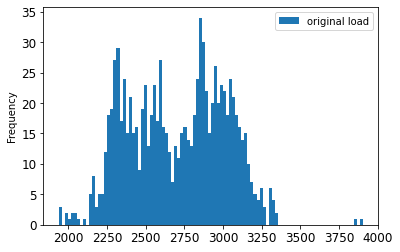

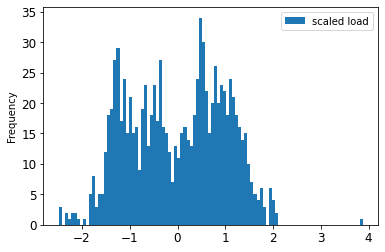

In [21]:
stlf_data[(stlf_data.index >=4801) & (stlf_data.index <=5761)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=4801) & (valid.index <=5761)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [22]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+1'] = valid_shifted['Cons'].shift(-1)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4801,1.453395,0.426803,0.324953,-1.661325,0.80997,0.81827,1.594877,1.263831,0.961803,2.011702,1.642757,1.070500,1.412560,1.456630
4802,1.456630,0.532039,0.201066,-1.661325,0.80997,0.81827,1.620656,1.491715,0.961803,2.080091,1.695945,1.103536,1.452280,1.476043
4803,1.476043,0.637276,0.077179,-1.661325,0.80997,0.81827,1.578765,1.517392,0.971425,1.958856,1.679149,1.051230,1.492827,1.404865
4804,1.404865,0.742512,-0.046707,-1.516862,0.80997,0.81827,1.543319,1.520601,0.923317,1.881142,1.642757,0.990665,1.531444,1.414571
4805,1.414571,0.847748,-0.170594,-1.516862,0.80997,0.81827,1.440203,1.581584,1.256863,1.940205,1.455199,1.015442,1.542201,1.408100
4806,1.408100,0.952985,-0.294480,-1.516862,0.80997,0.81827,1.443425,1.607261,1.484573,1.980617,1.567174,1.155842,1.532823,1.359570
4807,1.359570,1.058221,-0.418367,-1.516862,0.80997,0.81827,1.462760,1.565536,1.510230,2.005485,1.530782,1.117301,1.517101,1.223685
4808,1.223685,1.163457,-0.542254,-1.372399,0.80997,0.81827,1.391867,1.530230,1.513437,1.878033,1.581171,1.081512,1.489517,1.139566
4809,1.139566,1.268694,-0.666140,-1.372399,0.80997,0.81827,1.401534,1.427522,1.574374,1.753690,1.438403,0.943865,1.449522,1.120154
4810,1.120154,1.373930,-0.790027,-1.372399,0.80997,0.81827,1.395090,1.430732,1.600031,1.585826,1.312432,0.803465,1.405664,1.081330


In [23]:
for t in range(1, T+1):
    valid_shifted['Cons_t-'+str(T-t)] = valid_shifted['Cons'].shift(T-t)
valid_shifted = valid_shifted.rename(columns={'Cons':'Cons_original'})
valid_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
4801,1.453395,0.426803,0.324953,-1.661325,0.80997,0.81827,1.594877,1.263831,0.961803,2.011702,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.453395
4802,1.456630,0.532039,0.201066,-1.661325,0.80997,0.81827,1.620656,1.491715,0.961803,2.080091,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.453395,1.456630
4803,1.476043,0.637276,0.077179,-1.661325,0.80997,0.81827,1.578765,1.517392,0.971425,1.958856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.453395,1.456630,1.476043
4804,1.404865,0.742512,-0.046707,-1.516862,0.80997,0.81827,1.543319,1.520601,0.923317,1.881142,...,NaN,NaN,NaN,NaN,NaN,NaN,1.453395,1.456630,1.476043,1.404865
4805,1.414571,0.847748,-0.170594,-1.516862,0.80997,0.81827,1.440203,1.581584,1.256863,1.940205,...,NaN,NaN,NaN,NaN,NaN,1.453395,1.456630,1.476043,1.404865,1.414571
4806,1.408100,0.952985,-0.294480,-1.516862,0.80997,0.81827,1.443425,1.607261,1.484573,1.980617,...,NaN,NaN,NaN,NaN,1.453395,1.456630,1.476043,1.404865,1.414571,1.408100
4807,1.359570,1.058221,-0.418367,-1.516862,0.80997,0.81827,1.462760,1.565536,1.510230,2.005485,...,NaN,NaN,NaN,1.453395,1.456630,1.476043,1.404865,1.414571,1.408100,1.359570
4808,1.223685,1.163457,-0.542254,-1.372399,0.80997,0.81827,1.391867,1.530230,1.513437,1.878033,...,NaN,NaN,1.453395,1.456630,1.476043,1.404865,1.414571,1.408100,1.359570,1.223685
4809,1.139566,1.268694,-0.666140,-1.372399,0.80997,0.81827,1.401534,1.427522,1.574374,1.753690,...,NaN,1.453395,1.456630,1.476043,1.404865,1.414571,1.408100,1.359570,1.223685,1.139566
4810,1.120154,1.373930,-0.790027,-1.372399,0.80997,0.81827,1.395090,1.430732,1.600031,1.585826,...,1.453395,1.456630,1.476043,1.404865,1.414571,1.408100,1.359570,1.223685,1.139566,1.120154


In [24]:
valid_shifted = valid_shifted.dropna(how='any')
valid_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
4811,1.081330,1.479167,-0.913914,-1.372399,0.80997,0.81827,1.346754,1.449990,1.558338,1.445939,...,1.456630,1.476043,1.404865,1.414571,1.408100,1.359570,1.223685,1.139566,1.120154,1.081330
4812,1.010152,1.584403,-1.037800,-1.227936,0.80997,0.81827,1.211414,1.379378,1.523059,1.399310,...,1.476043,1.404865,1.414571,1.408100,1.359570,1.223685,1.139566,1.120154,1.081330,1.010152
4813,0.922798,1.619482,-1.081160,-1.227936,0.80997,0.81827,1.127632,1.389007,1.420429,1.396202,...,1.404865,1.414571,1.408100,1.359570,1.223685,1.139566,1.120154,1.081330,1.010152,0.922798
4814,0.919562,1.654561,-1.124521,-1.227936,0.80997,0.81827,1.108298,1.382587,1.423636,1.458374,...,1.414571,1.408100,1.359570,1.223685,1.139566,1.120154,1.081330,1.010152,0.922798,0.919562
4815,0.942210,1.689639,-1.167881,-1.227936,0.80997,0.81827,1.069630,1.334443,1.442880,1.439722,...,1.408100,1.359570,1.223685,1.139566,1.120154,1.081330,1.010152,0.922798,0.919562,0.942210


In [25]:
y_valid = valid_shifted[['y_t+1']]
y_valid


,y_t+1
4811,1.010152
4812,0.922798
4813,0.919562
4814,0.942210
4815,0.903386
...,...
5755,-0.044572
5756,-0.144868
5757,-0.387519
5758,-0.406931


In [26]:
X_valid = valid_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
4811,1.081330,1.081330,1.120154,1.139566,1.223685,1.359570,1.408100,1.414571,1.404865,1.476043,...,-1.372399,0.809970,0.818270,1.346754,1.449990,1.558338,1.445939,1.225651,0.729136,1.362083
4812,1.010152,1.010152,1.081330,1.120154,1.139566,1.223685,1.359570,1.408100,1.414571,1.404865,...,-1.227936,0.809970,0.818270,1.211414,1.379378,1.523059,1.399310,1.136072,0.704359,1.315467
4813,0.922798,0.922798,1.010152,1.081330,1.120154,1.139566,1.223685,1.359570,1.408100,1.414571,...,-1.227936,0.809970,0.818270,1.127632,1.389007,1.420429,1.396202,1.133272,0.635536,1.270231
4814,0.919562,0.919562,0.922798,1.010152,1.081330,1.120154,1.139566,1.223685,1.359570,1.408100,...,-1.227936,0.809970,0.818270,1.108298,1.382587,1.423636,1.458374,1.183661,0.690594,1.224443
4815,0.942210,0.942210,0.919562,0.922798,1.010152,1.081330,1.120154,1.139566,1.223685,1.359570,...,-1.227936,0.809970,0.818270,1.069630,1.334443,1.442880,1.439722,1.155667,0.682336,1.178930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5755,-0.038101,-0.038101,-0.047807,-0.264576,-0.578405,-0.604288,-0.513698,-0.484580,-0.436049,-0.393990,...,1.516862,-1.433454,-1.222091,-0.609229,-0.405178,-0.333895,0.131006,-1.198600,0.855771,-0.399657
5756,-0.044572,-0.044572,-0.038101,-0.047807,-0.264576,-0.578405,-0.604288,-0.513698,-0.484580,-0.436049,...,1.661325,-1.433454,-1.222091,-0.583450,-0.446903,-0.353138,0.106137,-1.206998,0.795206,-0.374832
5757,-0.144868,-0.144868,-0.044572,-0.038101,-0.047807,-0.264576,-0.578405,-0.604288,-0.513698,-0.484580,...,1.661325,-1.433454,-1.222091,-0.270879,-0.495047,-0.436525,0.031531,-1.215396,0.712618,-0.351386
5758,-0.387519,-0.387519,-0.144868,-0.044572,-0.038101,-0.047807,-0.264576,-0.578405,-0.604288,-0.513698,...,1.661325,-1.433454,-1.222091,-0.054980,-0.523934,-0.468597,-0.130116,-1.321772,0.632783,-0.345870


In [27]:
X_valid=np.atleast_3d(X_valid)
X_valid.shape

(949, 24, 1)

In [28]:
#subsequences=2
#X_valid=X_valid.shape[1]//subsequences
X_valid=X_valid.reshape(949,2,1,12)
print(X_valid.shape)

(949, 2, 1, 12)


In [29]:
#from keras.layers import RepeatVector
from keras.layers import BatchNormalization
from keras.layers import Input

model = models.Sequential()
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu'),input_shape=(None,1,12)))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(Dropout(0.1))
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(Dropout(0.1))
#model.add(TimeDistributed(MaxPooling1D(pool_size=2,strides=1, padding='valid')))
#model.add(Dropout(0.1))
model.add(TimeDistributed(Flatten()))
#model.add(RepeatVector(5629))
model.add((LSTM(128,activation='linear')))
#model.add(Flatten())
#model.add(GRU(300))
#model.add(Dense(150,activation='linear'))
#model.add(Dense(75,activation='linear'))
#model.add(Dropout(0.1))
#model.add(Bidirectional(LSTM(300)))
model.add(Dense(1,activation='linear'))

In [30]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.005)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, None, 1, 128)      1664      
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 1, 128)      16512     
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 1, 128)      0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 128)         0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 149,889
Trainable params: 149,889
Non-trainable params: 0
__________________________________________________

In [31]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [32]:

history = model.fit(X_train,
          y_train,
          batch_size=300,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),
          callbacks=[earlystop],
          )


Epoch 1/300
16/16 [==============================] - 1s 62ms/step - loss: 0.2191 - val_loss: 0.1826
Epoch 2/300
16/16 [==============================] - 0s 22ms/step - loss: 0.0623 - val_loss: 0.0996
Epoch 3/300
16/16 [==============================] - 0s 23ms/step - loss: 0.0400 - val_loss: 0.0771
Epoch 4/300
16/16 [==============================] - 0s 21ms/step - loss: 0.0312 - val_loss: 0.0576
Epoch 5/300
16/16 [==============================] - 0s 23ms/step - loss: 0.0247 - val_loss: 0.0478
Epoch 6/300
16/16 [==============================] - 0s 24ms/step - loss: 0.0199 - val_loss: 0.0435
Epoch 7/300
16/16 [==============================] - 0s 22ms/step - loss: 0.0185 - val_loss: 0.0412
Epoch 8/300
16/16 [==============================] - 0s 21ms/step - loss: 0.0181 - val_loss: 0.0408
Epoch 9/300
16/16 [==============================] - 0s 22ms/step - loss: 0.0178 - val_loss: 0.0398
Epoch 10/300
16/16 [==============================] - 0s 21ms/step - loss: 0.0171 - val_loss: 0.0397

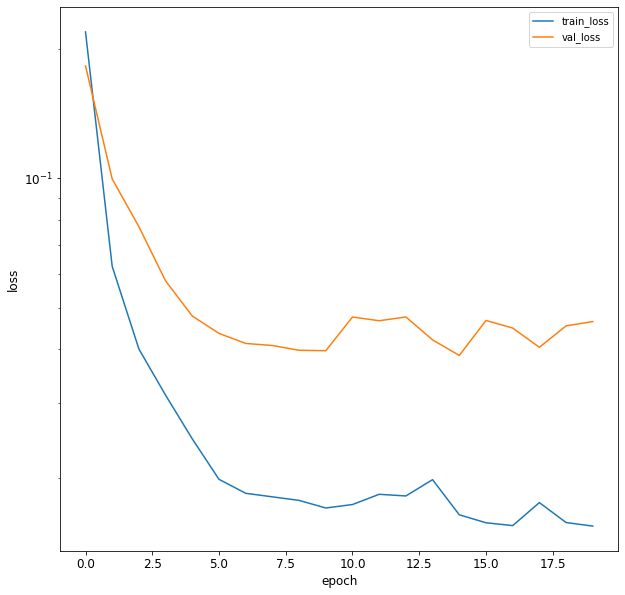

In [33]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [34]:
test = stlf_data.copy()[stlf_data.index >= 5762][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
5762,3843.0,30.117452,82.142275,1.0,1.0,0.0,3893.0,3809.0,3754.0,3720.0,3934.0,3966.0,3841.666667
5763,3850.0,29.772451,84.059240,1.0,1.0,0.0,3902.0,3835.0,3792.0,3709.0,3924.0,3921.0,3846.500000
5764,3814.0,29.772451,84.059240,2.0,1.0,0.0,3906.0,3820.0,3799.0,3707.0,3909.0,3905.0,3847.750000
5765,3799.0,29.772451,84.059240,2.0,1.0,0.0,3852.0,3847.0,3802.0,3692.0,3906.0,3868.0,3847.500000
5766,3793.0,29.927450,83.147055,2.0,1.0,0.0,3843.0,3893.0,3809.0,3680.0,3913.0,3825.0,3846.166667
5767,3774.0,30.082450,82.234870,2.0,1.0,0.0,3850.0,3902.0,3835.0,3663.0,3915.0,3775.0,3841.083333
5768,3764.0,30.082450,82.234870,3.0,1.0,0.0,3814.0,3906.0,3820.0,3619.0,3894.0,3760.0,3836.416667
5769,3716.0,30.082450,82.234870,3.0,1.0,0.0,3799.0,3852.0,3847.0,3607.0,3883.0,3726.0,3825.500000
5770,3660.0,29.782450,84.208200,3.0,1.0,0.0,3793.0,3843.0,3893.0,3612.0,3848.0,3729.0,3806.083333
5771,3656.0,29.482450,86.181530,3.0,1.0,0.0,3774.0,3850.0,3902.0,3581.0,3828.0,3732.0,3785.583333


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2878 entries, 5762 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    2878 non-null   float64
 1   Temp    2878 non-null   float64
 2   Hum     2878 non-null   float64
 3   A       2878 non-null   float64
 4   B       2878 non-null   float64
 5   C       2878 non-null   float64
 6   D       2878 non-null   float64
 7   E       2878 non-null   float64
 8   F       2878 non-null   float64
 9   G       2878 non-null   float64
 10  H       2878 non-null   float64
 11  I       2878 non-null   float64
 12  J       2878 non-null   float64
dtypes: float64(13)
memory usage: 314.8 KB


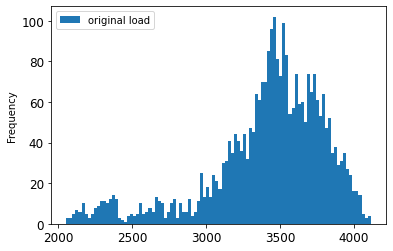

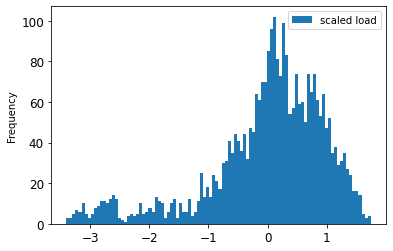

In [36]:
stlf_data[stlf_data.index >= 5762][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[test.index >=5762][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [37]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+1'] = test_shifted['Cons'].shift(-1)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
5762,1.068089,-0.180495,0.780259,-1.663498,-1.394118,-1.415689,1.190874,0.978195,0.837883,0.728042,1.438939,1.587039,1.079298,1.085581
5763,1.085581,-0.276149,0.919980,-1.663498,-1.394118,-1.415689,1.213408,1.043405,0.933357,0.697802,1.405550,1.421347,1.091609,0.995620
5764,0.995620,-0.276149,0.919980,-1.518946,-1.394118,-1.415689,1.223423,1.005784,0.950944,0.692304,1.355466,1.362434,1.094793,0.958136
5765,0.958136,-0.276149,0.919980,-1.518946,-1.394118,-1.415689,1.088217,1.073502,0.958481,0.651069,1.345450,1.226198,1.094156,0.943142
5766,0.943142,-0.233174,0.853494,-1.518946,-1.394118,-1.415689,1.065683,1.188875,0.976069,0.618080,1.368822,1.067870,1.090760,0.895662
5767,0.895662,-0.190199,0.787008,-1.518946,-1.394118,-1.415689,1.083210,1.211447,1.041393,0.571347,1.375500,0.883767,1.077812,0.870673
5768,0.870673,-0.190199,0.787008,-1.374395,-1.394118,-1.415689,0.993072,1.221480,1.003706,0.450389,1.305382,0.828536,1.065925,0.750724
5769,0.750724,-0.190199,0.787008,-1.374395,-1.394118,-1.415689,0.955515,1.086043,1.071542,0.417401,1.268654,0.703347,1.038119,0.610783
5770,0.610783,-0.273377,0.930838,-1.374395,-1.394118,-1.415689,0.940492,1.063470,1.187115,0.431146,1.151792,0.714393,0.988662,0.600788
5771,0.600788,-0.356554,1.074667,-1.374395,-1.394118,-1.415689,0.892920,1.081027,1.209727,0.345926,1.085014,0.725439,0.936446,0.643270


In [38]:
for t in range(1, T+1):
    test_shifted['Cons_t-'+str(T-t)] = test_shifted['Cons'].shift(T-t)
test_shifted = test_shifted.rename(columns={'Cons':'Cons_original'})
test_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
5762,1.068089,-0.180495,0.780259,-1.663498,-1.394118,-1.415689,1.190874,0.978195,0.837883,0.728042,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.068089
5763,1.085581,-0.276149,0.919980,-1.663498,-1.394118,-1.415689,1.213408,1.043405,0.933357,0.697802,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.068089,1.085581
5764,0.995620,-0.276149,0.919980,-1.518946,-1.394118,-1.415689,1.223423,1.005784,0.950944,0.692304,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.068089,1.085581,0.995620
5765,0.958136,-0.276149,0.919980,-1.518946,-1.394118,-1.415689,1.088217,1.073502,0.958481,0.651069,...,NaN,NaN,NaN,NaN,NaN,NaN,1.068089,1.085581,0.995620,0.958136
5766,0.943142,-0.233174,0.853494,-1.518946,-1.394118,-1.415689,1.065683,1.188875,0.976069,0.618080,...,NaN,NaN,NaN,NaN,NaN,1.068089,1.085581,0.995620,0.958136,0.943142
5767,0.895662,-0.190199,0.787008,-1.518946,-1.394118,-1.415689,1.083210,1.211447,1.041393,0.571347,...,NaN,NaN,NaN,NaN,1.068089,1.085581,0.995620,0.958136,0.943142,0.895662
5768,0.870673,-0.190199,0.787008,-1.374395,-1.394118,-1.415689,0.993072,1.221480,1.003706,0.450389,...,NaN,NaN,NaN,1.068089,1.085581,0.995620,0.958136,0.943142,0.895662,0.870673
5769,0.750724,-0.190199,0.787008,-1.374395,-1.394118,-1.415689,0.955515,1.086043,1.071542,0.417401,...,NaN,NaN,1.068089,1.085581,0.995620,0.958136,0.943142,0.895662,0.870673,0.750724
5770,0.610783,-0.273377,0.930838,-1.374395,-1.394118,-1.415689,0.940492,1.063470,1.187115,0.431146,...,NaN,1.068089,1.085581,0.995620,0.958136,0.943142,0.895662,0.870673,0.750724,0.610783
5771,0.600788,-0.356554,1.074667,-1.374395,-1.394118,-1.415689,0.892920,1.081027,1.209727,0.345926,...,1.068089,1.085581,0.995620,0.958136,0.943142,0.895662,0.870673,0.750724,0.610783,0.600788


In [39]:
test_shifted = test_shifted.dropna(how='any')
test_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
5772,0.643270,-0.356554,1.074667,-1.229843,-1.394118,-1.415689,0.867881,0.990735,1.219777,0.224969,...,1.085581,0.995620,0.958136,0.943142,0.895662,0.870673,0.750724,0.610783,0.600788,0.643270
5773,0.575798,-0.356554,1.074667,-1.229843,-1.394118,-1.415689,0.747698,0.953114,1.084104,0.189231,...,0.995620,0.958136,0.943142,0.895662,0.870673,0.750724,0.610783,0.600788,0.643270,0.575798
5774,0.600788,-0.538158,1.218590,-1.229843,-1.394118,-1.415689,0.607484,0.938065,1.061492,0.241463,...,0.958136,0.943142,0.895662,0.870673,0.750724,0.610783,0.600788,0.643270,0.575798,0.600788
5775,0.550809,-0.719762,1.362513,-1.229843,-1.394118,-1.415689,0.597469,0.890411,1.079079,0.137000,...,0.943142,0.895662,0.870673,0.750724,0.610783,0.600788,0.643270,0.575798,0.600788,0.550809
5776,0.433359,-0.719762,1.362513,-1.085292,-1.394118,-1.415689,0.640034,0.865330,0.988631,0.205726,...,0.895662,0.870673,0.750724,0.610783,0.600788,0.643270,0.575798,0.600788,0.550809,0.433359


In [40]:
y_test = test_shifted[['y_t+1']]
y_test

,y_t+1
5772,0.575798
5773,0.600788
5774,0.550809
5775,0.433359
5776,0.403372
...,...
8634,-1.898149
8635,-1.915642
8636,-2.050584
8637,-2.085570


In [41]:
X_test = test_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
5772,0.643270,0.643270,0.600788,0.610783,0.750724,0.870673,0.895662,0.943142,0.958136,0.995620,...,-1.229843,-1.394118,-1.415689,0.867881,0.990735,1.219777,0.224969,0.981507,0.537654,0.886989
5773,0.575798,0.575798,0.643270,0.600788,0.610783,0.750724,0.870673,0.895662,0.943142,0.958136,...,-1.229843,-1.394118,-1.415689,0.747698,0.953114,1.084104,0.189231,0.747783,0.640752,0.843263
5774,0.600788,0.600788,0.575798,0.643270,0.600788,0.610783,0.750724,0.870673,0.895662,0.943142,...,-1.229843,-1.394118,-1.415689,0.607484,0.938065,1.061492,0.241463,0.797866,0.515562,0.803570
5775,0.550809,0.550809,0.600788,0.575798,0.643270,0.600788,0.610783,0.750724,0.870673,0.895662,...,-1.229843,-1.394118,-1.415689,0.597469,0.890411,1.079079,0.137000,0.761138,0.533972,0.758146
5776,0.433359,0.433359,0.550809,0.600788,0.575798,0.643270,0.600788,0.610783,0.750724,0.870673,...,-1.085292,-1.394118,-1.415689,0.640034,0.865330,0.988631,0.205726,0.667649,0.360915,0.710388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8634,-1.833177,-1.833177,-1.880657,-1.835676,-1.803190,-1.785697,-1.850669,-1.810686,-1.765706,-1.820682,...,1.516636,-0.902418,0.706370,-1.793676,-1.835888,-1.646941,-2.930920,-3.178789,-0.894665,-1.827833
8635,-1.898149,-1.898149,-1.833177,-1.880657,-1.835676,-1.803190,-1.785697,-1.850669,-1.810686,-1.765706,...,1.516636,-0.902418,0.706370,-1.811203,-1.780710,-1.646941,-3.002394,-3.148738,-0.890983,-1.850969
8636,-1.915642,-1.915642,-1.898149,-1.833177,-1.880657,-1.835676,-1.803190,-1.785697,-1.850669,-1.810686,...,1.661188,-0.902418,0.706370,-1.843752,-1.825856,-1.689653,-3.054626,-3.198822,-0.905711,-1.871983
8637,-2.050584,-2.050584,-1.915642,-1.898149,-1.833177,-1.880657,-1.835676,-1.803190,-1.785697,-1.850669,...,1.661188,-0.902418,0.706370,-1.888821,-1.865985,-1.790151,-3.090363,-3.235550,-0.957260,-1.895968


In [42]:
X_test=np.atleast_3d(X_test)
X_test.shape

(2867, 24, 1)

In [43]:
X_test=np.atleast_3d(X_test)
X_test.shape

(2867, 24, 1)

In [44]:
#subsequences=2
#X_test=X_test//subsequences
#X_test=X_test.reshape(1488,subsequences,12,1)
#print(X_test.shape)
X_test=X_test.reshape(2867,2,1,12)

In [45]:
predictions = model.predict(X_test)
predictions

array([[ 0.7159622 ],
       [ 0.63606924],
       [ 0.6468928 ],
       ...,
       [-1.9465263 ],
       [-2.051227  ],
       [-2.0807128 ]], dtype=float32)

In [46]:
feature=stlf_data.copy()[stlf_data.index >= 5762][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    3415.582696
dtype: float64
Cons    400.239702
dtype: float64


In [47]:
load_mean=3415.582696
load_std=400.239702
rescaled_target_load=(y_test*load_std)+load_mean
rescaled_target_load

,y_t+1
5772,3646.040041
5773,3656.041779
5774,3636.038303
5775,3589.030136
5776,3577.028050
...,...
8634,2655.868001
8635,2648.866785
8636,2594.857401
8637,2580.854968


In [48]:
rescaled_predicted_load=(predictions*load_std)+load_mean
rescaled_predicted_load

array([[3702.1392],
       [3670.1628],
       [3674.4949],
       ...,
       [2636.5056],
       [2594.6   ],
       [2582.7988]], dtype=float32)

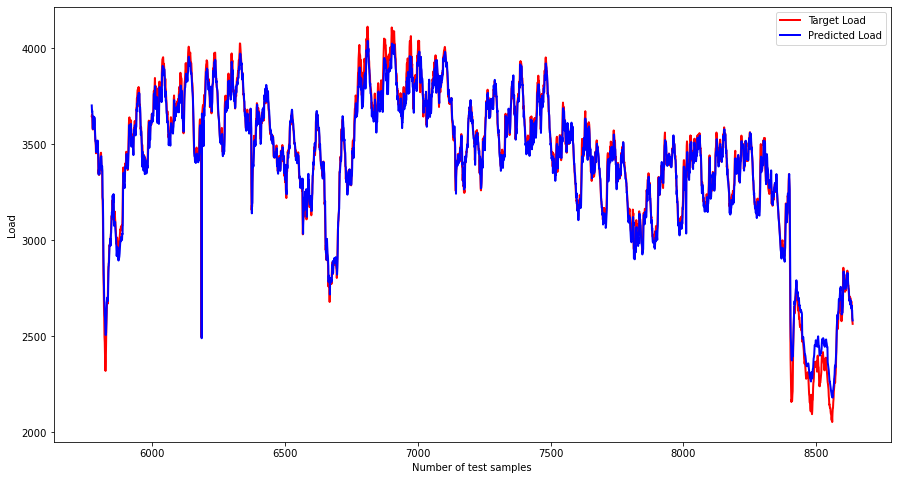

In [49]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [50]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

1.229222670766011


In [51]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+1    0.105299
dtype: float64


In [52]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

              y_t+1
5772  364502.465473
5773  365503.791643
5774  363502.772676
5775  358801.545995
5776  357602.672608
...             ...
8634  265486.582063
8635  264787.144365
8636  259384.135053
8637  257984.964213
8638  256384.519034

[2867 rows x 1 columns]


In [53]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

            y_t+1
5772  3147.111165
5773   199.404420
5774  1478.907759
5775  2774.315205
5776    22.439987
...           ...
8634    33.540576
8635   152.291933
8636  1734.573764
8637   188.928591
8638   322.081910

[2867 rows x 1 columns]
y_t+1    3546.013334
dtype: float64


In [54]:
RMSE=MSE**0.5
print(RMSE)

y_t+1    59.548412
dtype: float64


In [55]:
a=np.array(rescaled_predicted_load)

In [56]:
for i in  range(0,2867):
    b=a[i]
    print(b)

[3702.1392]
[3670.1628]
[3674.4949]
[3641.702]
[3581.7651]
[3579.2458]
[3631.8967]
[3644.2205]
[3587.2659]
[3599.9988]
[3640.2793]
[3616.909]
[3574.0037]
[3545.4312]
[3514.9548]
[3514.2148]
[3494.2131]
[3458.8564]
[3509.3667]
[3496.9377]
[3467.7732]
[3477.9417]
[3519.4395]
[3494.3652]
[3457.8323]
[3422.4712]
[3342.1755]
[3371.2827]
[3355.8308]
[3344.4065]
[3392.7483]
[3384.0632]
[3390.1653]
[3388.0703]
[3432.0293]
[3434.4365]
[3437.8452]
[3402.9631]
[3367.8823]
[3386.622]
[3365.418]
[3221.6763]
[3209.8276]
[3110.9834]
[2915.7227]
[2832.0107]
[2775.7336]
[2692.535]
[2678.501]
[2610.8398]
[2595.3125]
[2548.2302]
[2509.419]
[2506.853]
[2520.2124]
[2586.181]
[2640.1797]
[2676.406]
[2692.4265]
[2702.7683]
[2687.514]
[2683.2615]
[2763.2266]
[2842.0928]
[2878.442]
[2884.682]
[2939.8655]
[2974.815]
[2978.3665]
[2975.262]
[3008.2456]
[2972.4229]
[3031.1506]
[3037.8774]
[3087.9146]
[3117.9714]
[3147.5254]
[3120.1929]
[3227.882]
[3233.9768]
[3211.9653]
[3196.1597]
[3240.4375]
[3191.579]
[3093.657

[3192.6418]
[3230.2273]
[3216.93]
[3151.586]
[3152.6497]
[3154.5679]
[3231.5127]
[3245.6592]
[3336.5618]
[3339.037]
[3378.325]
[3407.282]
[3392.6367]
[3435.005]
[3466.5142]
[3464.557]
[3505.529]
[3466.8494]
[3476.0867]
[3506.682]
[3516.389]
[3646.141]
[3667.0059]
[3672.0298]
[3673.229]
[3651.3733]
[3649.1382]
[3653.8499]
[3631.5596]
[3586.674]
[3586.5132]
[3572.0637]
[3584.3828]
[3562.4695]
[3534.0977]
[3469.5957]
[3501.0054]
[3459.5527]
[3430.2185]
[3397.4294]
[3388.587]
[3384.7776]
[3380.8518]
[3365.6277]
[3380.2207]
[3368.9514]
[3321.4539]
[3407.9697]
[3395.2136]
[3388.6016]
[3404.323]
[3363.664]
[3346.2893]
[3233.5757]
[3183.7173]
[3203.7476]
[3075.7876]
[2989.946]
[2936.4834]
[2971.2163]
[2954.9119]
[2897.56]
[3007.465]
[2966.0552]
[2932.384]
[2921.2844]
[2902.6426]
[2865.1577]
[2783.296]
[2816.3726]
[2789.1099]
[2801.7832]
[2789.5034]
[2717.8286]
[2789.0352]
[2793.1938]
[2804.1787]
[2793.602]
[2781.3167]
[2793.2231]
[2789.1013]
[2832.4504]
[2871.0166]
[2856.0952]
[2891.8662]
[282

[3634.0068]
[3613.6094]
[3623.58]
[3639.5364]
[3685.3672]
[3668.6086]
[3656.2961]
[3641.6624]
[3598.7532]
[3558.6487]
[3581.8352]
[3618.8398]
[3680.5054]
[3704.1025]
[3723.6702]
[3747.45]
[3801.653]
[3799.2622]
[3827.5847]
[3802.5493]
[3788.3015]
[3822.2454]
[3858.795]
[3748.5994]
[3742.0903]
[3755.7263]
[3696.551]
[3650.8052]
[3696.5151]
[3648.8435]
[3572.607]
[3523.7427]
[3560.9543]
[3580.3271]
[3555.0369]
[3585.9348]
[3615.5815]
[3666.7664]
[3717.3115]
[3719.1577]
[3730.5315]
[3742.3164]
[3730.0203]
[3723.0586]
[3784.0237]
[3819.0752]
[3794.2214]
[3839.178]
[3916.0051]
[3878.0635]
[3904.8135]
[3864.917]
[3908.289]
[3890.1465]
[3849.0264]
[3828.0015]
[3807.0288]
[3809.815]
[3763.9058]
[3749.8147]
[3722.211]
[3640.6558]
[3669.96]
[3626.4924]
[3599.291]
[3589.6711]
[3559.0999]
[3538.026]
[3494.785]
[3506.2974]
[3478.3137]
[3447.742]
[3461.591]
[3476.9395]
[3487.8213]
[3464.1694]
[3457.9507]
[3503.172]
[3515.5452]
[3507.1848]
[3498.3457]
[3478.501]
[3466.269]
[3439.4724]
[3485.0647]
[35

[3370.7466]
[3456.6172]
[3401.533]
[3413.4338]
[3462.9604]
[3508.5757]
[3491.3591]
[3496.4163]
[3476.2827]
[3434.0789]
[3470.1375]
[3411.5374]
[3424.5864]
[3467.7563]
[3439.4084]
[3455.177]
[3456.418]
[3533.5347]
[3488.731]
[3473.8618]
[3518.5432]
[3523.3032]
[3521.289]
[3519.358]
[3496.8726]
[3545.87]
[3505.2202]
[3467.566]
[3440.069]
[3442.6423]
[3428.3225]
[3367.4255]
[3304.0413]
[3245.4277]
[3244.8228]
[3289.5713]
[3276.6707]
[3246.5098]
[3222.0015]
[3223.5027]
[3176.8286]
[3201.8284]
[3177.339]
[3150.9053]
[3151.0745]
[3149.2173]
[3159.0413]
[3153.0938]
[3180.0476]
[3168.372]
[3155.619]
[3168.794]
[3224.5942]
[3184.6323]
[3187.32]
[3146.986]
[3187.1113]
[3190.6213]
[3209.6838]
[3241.2573]
[3291.2756]
[3374.6458]
[3400.1106]
[3431.0898]
[3300.7021]
[3218.0713]
[3271.481]
[3217.1265]
[3227.335]
[3274.2175]
[3283.6667]
[3268.7178]
[3268.2185]
[3342.0159]
[3325.3428]
[3338.6003]
[3351.2742]
[3297.279]
[3296.8733]
[3296.936]
[3257.9946]
[3271.1504]
[3291.7004]
[3334.4048]
[3347.1963]
[